**K-Means Clustering Untuk Sistem Rekomendasi Kucing**

In [2]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
#baca dataset
file_path = r"E:\KucingKu Web\dataset\Dataset KucingKu Web.xlsx"
df = pd.read_excel(file_path, sheet_name="Dataset")
df = pd.DataFrame(df)
df.head()       

,Nama,Jenis Kelamin,Umur,Warna,Lokasi,Status Vaksinasi,Foto Kucing,Asal data
0,Hachi,Jantan,8 bulan,Hitam,Sidoarjo,Sudah,Hachi.jpg,DARI IG ADOPSI SURABAYA
1,Bedok,Betina,4 bulan,Coklat,Surabaya,Belum,Bedok.jpg,NaN
2,Januari,Jantan,2 bulan,Coklat,Surabaya,Belum,Januari.jpg,NaN
3,Iwak,Jantan,3 bulan,Abu-Abu,Surabaya,Belum,Iwak.jpg,NaN
4,Moza,Betina,2 tahun,Abu-Abu,Surabaya,Belum,Moza.jpg,NaN


In [4]:
#fungsi untuk mengelompokkan umur kucing
def kategori_umur(umur):
    if 'tahun' in umur:
        tahun = int(umur.split()[0])
        if tahun < 1:
            return "Baby"
        elif tahun < 2:
            return "Young"
        else:
            return "Adult"
    elif 'bulan' in umur:
        bulan = int(umur.split()[0])
        if bulan < 6:
            return "Baby"
        elif bulan < 12:
            return "Young"
        else:
            return "Adult"

In [5]:
#fungsi untuk mengelompokkan kategori lokasi
def kategori_lokasi(lokasi):
    if lokasi == 'Surabaya' or lokasi == 'Jakarta' or lokasi == 'Sidoarjo':
        return lokasi
    else:
        return 'Kota Lainnya'

In [6]:
df['Umur'] = df['Umur'].apply(kategori_umur)
df['Lokasi'] = df['Lokasi'].apply(kategori_lokasi)
df = df.drop(columns=['Asal data','Foto Kucing'])
df

,Nama,Jenis Kelamin,Umur,Warna,Lokasi,Status Vaksinasi
0,Hachi,Jantan,Young,Hitam,Sidoarjo,Sudah
1,Bedok,Betina,Baby,Coklat,Surabaya,Belum
2,Januari,Jantan,Baby,Coklat,Surabaya,Belum
3,Iwak,Jantan,Baby,Abu-Abu,Surabaya,Belum
4,Moza,Betina,Adult,Abu-Abu,Surabaya,Belum
...,...,...,...,...,...,...
94,Duren,Betina,Adult,Orange,Jakarta,Sudah
95,Bejo,Jantan,Adult,Hitam,Jakarta,Sudah
96,Maisy,Betina,Adult,Abu-Abu,Jakarta,Sudah
97,Snow,Betina,Young,Putih,Jakarta,Sudah


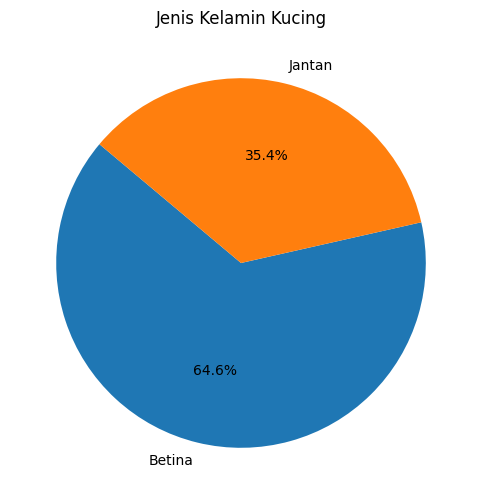

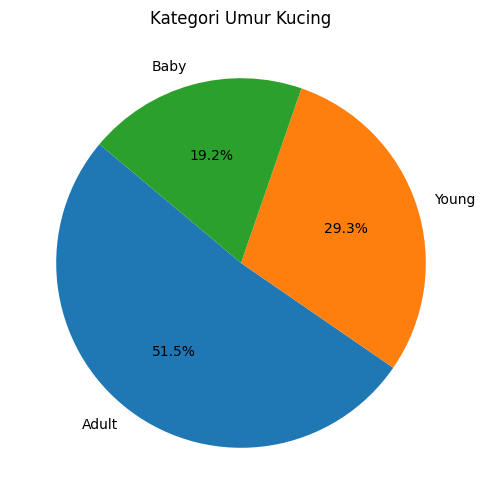

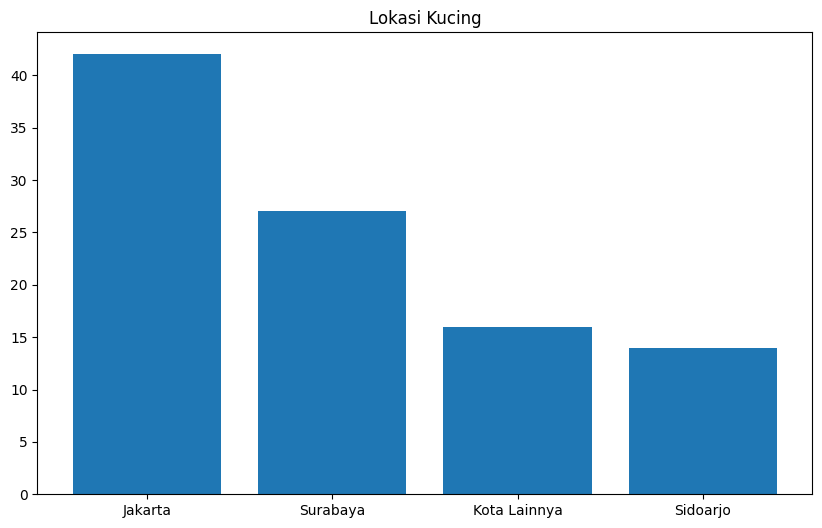

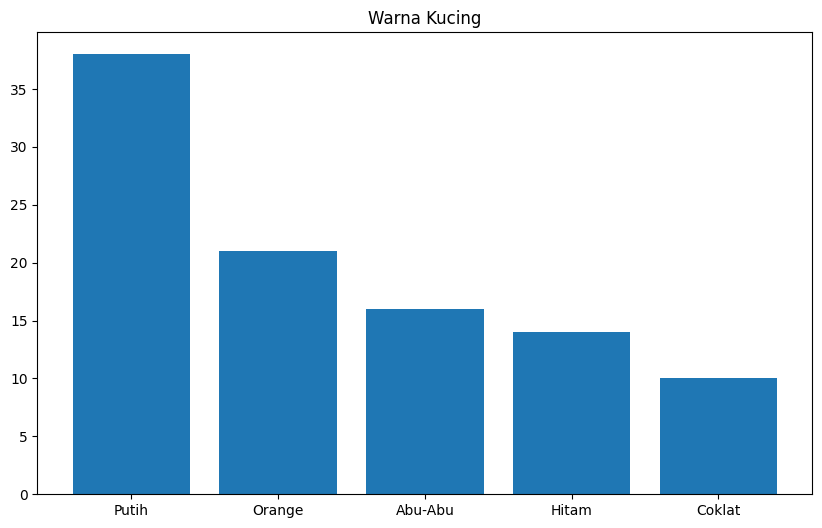

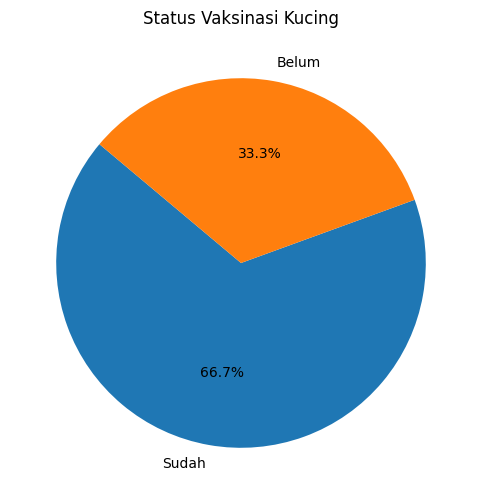

In [7]:
# Visualisasi Jenis kelamin
jenis_kelamin = df['Jenis Kelamin'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(jenis_kelamin, labels=jenis_kelamin.index, autopct='%1.1f%%', startangle=140)
plt.title('Jenis Kelamin Kucing')
plt.show()

# Visualisasi Kategori Umur
umur = df['Umur'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(umur, labels=umur.index, autopct='%1.1f%%', startangle=140)
plt.title('Kategori Umur Kucing')
plt.show()

#Visualisasi Lokasi 
lokasi = df['Lokasi'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(lokasi.index, lokasi)
plt.title('Lokasi Kucing')
plt.show()

#Visualisasi Warna
warna = df['Warna'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(warna.index, warna)
plt.title('Warna Kucing')
plt.show()

#Visualisasi Status Vaksin
vaksinasi = df['Status Vaksinasi'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(vaksinasi, labels=vaksinasi.index, autopct='%1.1f%%', startangle=140)
plt.title('Status Vaksinasi Kucing')
plt.show()

In [8]:
features = ['Jenis Kelamin', 'Umur','Warna', 'Status Vaksinasi']
X = df[features]
X = pd.get_dummies(X) #one hot encoding

In [9]:
#normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#reduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
#mencari jumlah cluster terbaik
inertia = []
silhouette = []
for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_pca, kmeans.labels_))
    #print setiap jumlah inertia dan silhouette
    print(f'Untuk Jumlah Cluster: {i}, Inertia: {kmeans.inertia_}, Silhouette: {silhouette_score(X_pca, kmeans.labels_)}')

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Untuk Jumlah Cluster: 2, Inertia: 265.56527534886806, Silhouette: 0.39894123130352455
Untuk Jumlah Cluster: 3, Inertia: 145.99223621008895, Silhouette: 0.45399339480496476
Untuk Jumlah Cluster: 4, Inertia: 96.22436924773078, Silhouette: 0.4745179297489087
Untuk Jumlah Cluster: 5, Inertia: 76.68222049007224, Silhouette: 0.4807276754070078
Untuk Jumlah Cluster: 6, Inertia: 62.52764566729409, Silhouette: 0.47321241879195247
Untuk Jumlah Cluster: 7, Inertia: 51.636431982335154, Silhouette: 0.47611492292012975
Untuk Jumlah Cluster: 8, Inertia: 44.092874507840726, Silhouette: 0.504150475899685


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 9, Inertia: 34.78239661270456, Silhouette: 0.5269242755053513
Untuk Jumlah Cluster: 10, Inertia: 29.58613577654899, Silhouette: 0.5597260207903293
Untuk Jumlah Cluster: 11, Inertia: 27.166397226456763, Silhouette: 0.5424124910060125
Untuk Jumlah Cluster: 12, Inertia: 22.867921609176776, Silhouette: 0.598003546269464
Untuk Jumlah Cluster: 13, Inertia: 21.067602657353483, Silhouette: 0.5993080865130347
Untuk Jumlah Cluster: 14, Inertia: 16.407594823095913, Silhouette: 0.6358282628497403


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 15, Inertia: 13.245788825707377, Silhouette: 0.6677388009642453
Untuk Jumlah Cluster: 16, Inertia: 11.631325757829673, Silhouette: 0.6683270952265572
Untuk Jumlah Cluster: 17, Inertia: 9.402169896317535, Silhouette: 0.718153101941702
Untuk Jumlah Cluster: 18, Inertia: 7.894973402497957, Silhouette: 0.7197663768442872
Untuk Jumlah Cluster: 19, Inertia: 6.339281076762058, Silhouette: 0.7502263085701331


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 20, Inertia: 5.284356977807544, Silhouette: 0.7591265108739058
Untuk Jumlah Cluster: 21, Inertia: 4.435519117594085, Silhouette: 0.7854770321674317
Untuk Jumlah Cluster: 22, Inertia: 3.522184780680424, Silhouette: 0.8089115521464608
Untuk Jumlah Cluster: 23, Inertia: 2.7437727333669537, Silhouette: 0.8289477583602738


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 24, Inertia: 2.1323446443641196, Silhouette: 0.8302910357377726
Untuk Jumlah Cluster: 25, Inertia: 1.7481916777820377, Silhouette: 0.8523272843341461
Untuk Jumlah Cluster: 26, Inertia: 1.5176998978327878, Silhouette: 0.8689352795700126
Untuk Jumlah Cluster: 27, Inertia: 1.2872081178835382, Silhouette: 0.8833124438724456


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 28, Inertia: 1.0810508735423034, Silhouette: 0.8796889766286219
Untuk Jumlah Cluster: 29, Inertia: 0.8838332488123126, Silhouette: 0.8905801160653265
Untuk Jumlah Cluster: 30, Inertia: 0.7438195566040586, Silhouette: 0.8883302628949017


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 31, Inertia: 0.6117248974833378, Silhouette: 0.8894031013692152
Untuk Jumlah Cluster: 32, Inertia: 0.4802464809966773, Silhouette: 0.9066173739132798
Untuk Jumlah Cluster: 33, Inertia: 0.34125173002661296, Silhouette: 0.9045045673905047


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 34, Inertia: 0.2132007411659187, Silhouette: 0.9042799220721094
Untuk Jumlah Cluster: 35, Inertia: 0.11992802814967785, Silhouette: 0.9071462444875974
Untuk Jumlah Cluster: 36, Inertia: 0.03241947051951827, Silhouette: 0.894851089399566


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Untuk Jumlah Cluster: 37, Inertia: 7.608964024285091e-30, Silhouette: 0.8888888803013345
Untuk Jumlah Cluster: 38, Inertia: 4.8448693681005305e-30, Silhouette: 0.8585858499983041
Untuk Jumlah Cluster: 39, Inertia: 4.0652529266125774e-30, Silhouette: 0.8383838307676721


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


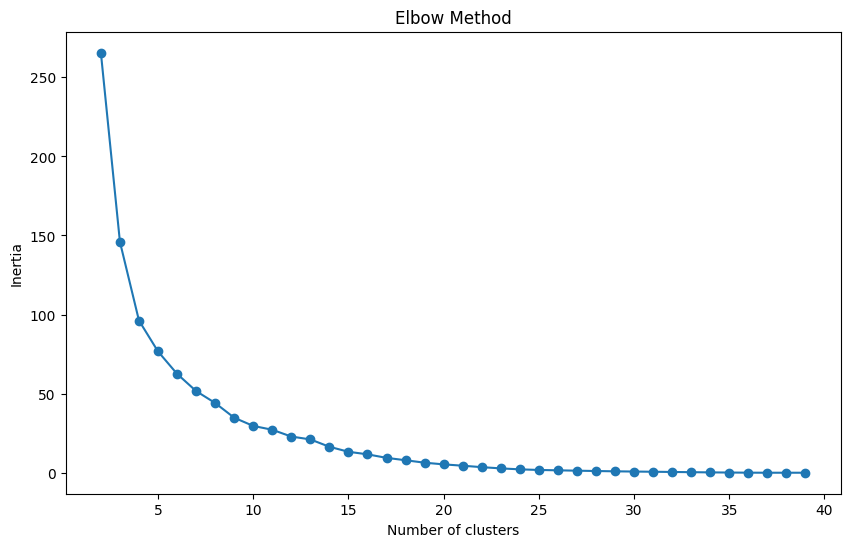

In [11]:
#visualisasi elbow method
plt.figure(figsize=(10,6))
plt.plot(range(2, 40), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

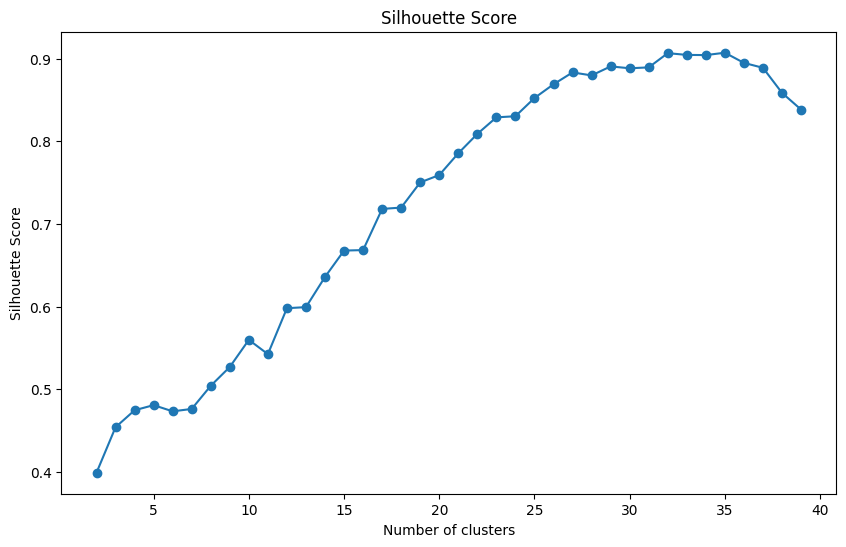

In [12]:
#tampilkan kluster terbaik
plt.figure(figsize=(10,6))
plt.plot(range(2,40), silhouette, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
best_k = max(range(2, 40), key=lambda k: silhouette[k-2]) #k-2 karena index dimulai dari 0 (jumlah minimal cluster adalah 2)
print("Nilai K terbaik adalah:", best_k)
print("Dengan skor siluet:", silhouette[best_k-2])


Nilai K terbaik adalah: 35
Dengan skor siluet: 0.9071462444875974


In [14]:
#pembagian kluster sesuai best_k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_pca)
df['Cluster'] = kmeans.labels_
df

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
#simpan ke df ke csv baru
df.to_csv('hasil_cluster.csv', index=False)

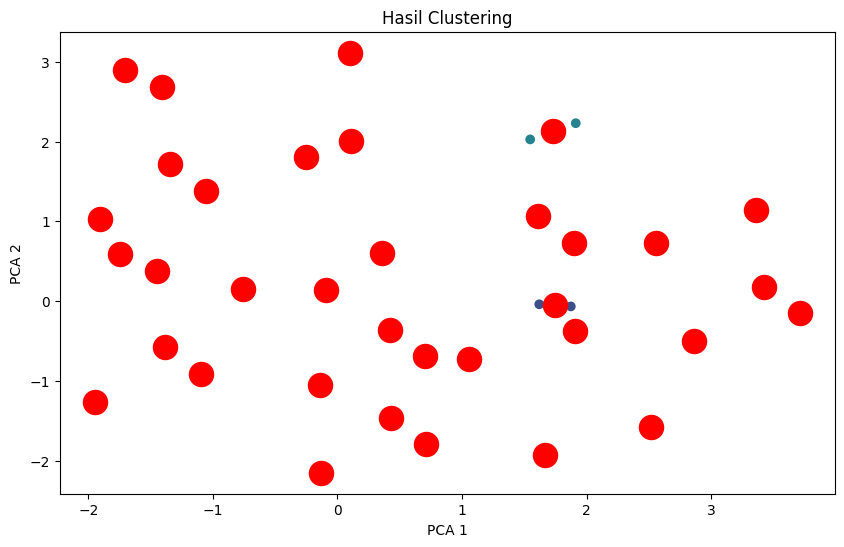

In [16]:
#visualisasi hasil clustering pakai heatmap
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.title('Hasil Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [17]:
# # visualisasi yang memperlihatkan perbedaan antara klaster-klaster, seperti histogram fitur-fitur utama
# # misalnya, visualisasi perbedaan umur, jenis kelamin, warna, dan status vaksinasi antar klaster
# # visualisasi untuk umur
# plt.figure(figsize=(10,6))
# for i in range(best_k):
#     plt.hist(df[df['Cluster']==i]['Umur'], alpha=0.5, label=f'Cluster {i}')
# plt.legend()
# plt.title('Umur Kucing per Cluster')
# plt.show()

# # visualisasi untuk jenis kelamin
# plt.figure(figsize=(10,6))
# for i in range(best_k):
#     plt.hist(df[df['Cluster']==i]['Jenis Kelamin'], alpha=0.5, label=f'Cluster {i}')
# plt.legend()
# plt.title('Jenis Kelamin Kucing per Cluster')
# plt.show()

# # visualisasi untuk warna
# plt.figure(figsize=(10,6))
# for i in range(best_k):
#     plt.hist(df[df['Cluster']==i]['Warna'], alpha=0.5, label=f'Cluster {i}')
# plt.legend()
# plt.title('Warna Kucing per Cluster')
# plt.show()

# # visualisasi untuk status vaksinasi
# plt.figure(figsize=(10,6))
# for i in range(best_k):
#     plt.hist(df[df['Cluster']==i]['Status Vaksinasi'], alpha=0.5, label=f'Cluster {i}')
# plt.legend()
# plt.title('Status Vaksinasi Kucing per Cluster')
# plt.show()